# 文本分类与打标签

本章内容

1. 本章内容概述
2. 基于卷积神经网络的文本分类模型详解
3. 基于RNN/LSTM的文本分类模型详解
4. 构建卷积神经网络完成影评褒贬分类
5. 构建LSTM模型完成新闻文本分类

## 本章内容概述

文本分类是一个常见的人工智能任务。通常我们需要对

## 基于卷积神经网络的文本分类模型

在这一节里，我们将介绍如何使用卷积神经网络（CNN）模型进行文本分类。

- 我们会首先介绍卷积神经网络的原理及相关的概念，比如池化等。
- 其次我们介绍一维卷积网络在文字上的应用。
- 随后，通过与图像数据的对比引入如何将二维卷积神经网络方法运用到文本信息建模中。
- 最后，我们将拓展单通道二维卷积神经网络到多通道卷积神经网络模型。

### 什么是卷积神经网络
卷积神经网络模型是利用卷积滤子对输入数据进行分析的技术。在数学里，卷积一词的含义是指通过两个函数f和g生成第三个函数h的操作，产出函数f经过函数g变换后的形态。通常函数g会对原始函数进行平移或者翻转操作。卷积既指代这个操作，也指代这个操作的结果函数。卷积还可以被看作是“加权移动平均”的推广。 我们利用下面这个wiki的图来演示卷积操作。
<img src="./pics/Convolution3.png" width="450">
这个图中有五行图片。
- 第一行的两幅图分别是原始函数f(t)和g(t)。假设两个函数都用 ${\tau }$ 来表示，从而得到f( $\tau$ )和g( $ \tau$ )。
- 第二行的图片希纳是将函数g($\tau$)向右移动t个单位并翻转后得到函数g( $\tau -t$)的图像。将g( $\tau -t$)翻转至纵轴另一侧，得到g(-($\tau$  -t))即g(t- $\tau$ )的图像。
- 第三行的图片显示了当时间变量$\tau$取不同值时，函数g(t-$\tau$ ) 沿着时间轴$\tau$“滑动”的动作。
- 第四行的图片显示了当f(t)和g(t)两函数交会时,两函数乘积的积分值。这个积分值可以理解为使用g(t-$\tau$)做为加权函数，来对f($\tau$)取加权值的结果。
- 第五行的图片显示了这个加权平均的持续过程。

最后得到的加权平均的结果就是f和g的卷积。如果f（t）是一个单位脉冲，我们得到的乘积就是g（t）本身，称为冲激响应。

<img src="./pics/Convolution_self.gif" width="450">
以上来自wiki的图显示了两个方形脉冲波的卷积。其中
函数"g"首先对 $\tau =0$反射，接着平移"t"，成为 $ g(t-\tau )$。那么重叠部分的面积就相当于"t"处的卷积，其中横坐标代表待变量 $ \tau $以及新函数 $ f\ast g$的自变量"t"。

<img src="./pics/Convolution_spiky.gif" width="450">
以上来自wiki的图显示了方形脉冲波和指数衰退的脉冲波的卷积，同样地重叠部分面积就相当于"t"处的卷积。注意到因为"g"是对称的，所以在这两张图中，反射并不会改变它的形状。

以上是对一维卷积的解释。卷积神经网络最常见于图像识别中，因此通常是使用二维卷积。下面简要说明（图片来源：http:www.wildml.com）。
<img src="./pics/CNNconcept.png" width="500">

二维卷积网络通常使用在与图像相关的建模工作中。在一个二维卷积网络里面，滤子是一个小的矩阵，比如一个$2\times 2$或者$3 \times 3$的矩阵。这个小的滤子对于输入的代表图像的矩阵的相应局部进行元素级别的乘积与求和，输出的矩阵即是二维卷积的结果。我们使用下图来解释。

<img src="./pics/Convolution_operation.png" width="500">

在上图中，左边较大的矩阵是原始输入图像的矩阵，中间蓝色边框的小矩阵代表滤子。在这个例子中，左边矩阵红框的局部与蓝色边框的滤子进行对应位置的元素级别的乘积操作：
$$
1 \times 1 + 0 \times 0 + 0 \times 1  + 1\times 0 + 1\times 1 + 0\times 0 + 1\times 1 + 1\times 0 + 1\times 1 = 4
$$
得到右边矩阵绿色框内的数据。

与上面提到的一维空间的例子类似，滤子会在原始矩阵内按照一定规律移动，每移动到一个新的位置就与该位置的相应元素进行类似的操作，得到卷积后的结果。过滤器以多大的跨度上下或左右平移地扫描移动的规律叫做“步长”（Stride）。在上例中，步长为1，即每完成一次卷积的操作后，滤子往右或者往下移动一个格子的距离，再进行卷积操作，直到移动到边界为止。当然，步长也可以为别的数字。卷积可以有效降低输入数据的维度，在保留核心信息的时候突出特定特征。

我们看到，一个滤子通过数值的排列，可以突出某种特定数据模式，从而帮助模型寻找所需要的特征。以下面的例子为例。左边的图展示了一个曲线特征。这个特征可以对应于各类图片的外凸曲线，比如车轮的一部分轮廓，数字0的一部分，等等，本身是一个抽象的特征。右边的图是对应于该特征的滤子矩阵，中间的图是输入的图。当滤子掠过这幅图片的区域，卷积计算会得到一个很大的数值输出，从而凸显图片里具备这个曲线轮廓特征。
<img src="./pics/CNNcurve.png" width="500">

滤子在图像领域应用历史悠久，有很多经典的滤子，通过不同的数值组合，可以产生不同的过滤效果。下图展示了三种典型的图像处理领域的滤子。
<img src="./pics/Convolution_filters.png" width="500">

在卷积神经网络模型中，滤子不是预先定义好的，而是作为参数在模型训练中优化得到的，因此相比预先定义好的滤子，卷积神经网络模型能够抓取更有效的图像特征。这些特征通常反映了抽象的概念，比如一个物体的边界，或者两个物体之间的距离，等。通过叠加卷积层，可以实现不停抽象的过程。比如在人脸侦测的任务中，第一层卷积神经网络可以将人脸的边界抽象出来，而第二层卷积神经网络可以将人眼之间的距离抽象出来，从而实现层级的特征抽象。这点非常类似于人脑的工作原理。

除了卷积滤子和步长之外，卷积神经网络里面还有一个概念叫“池化”（Pooling）。池化层将给定的特征图像中的几个空间上相邻的数据通过特定的函数输出，能显著降低模型参数的数量。池化有时也被称为subsampling或者downsampling。池化能在降低参数数量的同时尽可能地保留重要信息。池化对应的函数通常有三种：

- 最大 ：MaxPooling，取相邻格子中最大的值
- 平均 ：Average Pooling，取相邻格子中所有值的平均值
- 求和 ： Sum Pooling，取相邻格子中所有制的总和

下图显示了采用最大池化方法的结果，因为采用了$2\times 2$矩阵，步长为2的池化过程，因此池化后的结果为$2\times 2$的矩阵，保留了每个区域最大的数值。
<img src="./pics/MaxPooling2.png" width="500">


对于经由过滤器局部扫描后的卷积层图像，由于处理边界不同，一般有两种方式，对应于“补齐”（padding）这个概念。补齐有两种方法，一种方法是在局部扫描过程中对图像边界以外的一层或多层填上0，平移的时候可以移出边界外到达0的区域。这样的好处是在以1 为步长的局部扫描完以后，所得的新图像和原图像长宽一致，被称作zero padding(same padding)。另一种是不对边界外做任何0 的假定，所有平移都在边界内，被称作valid padding，使用这种方式通常扫描完的图像尺寸会比原来的小。



### 我们先展示手工滤子的效果

这里我们先用Python读入一个图片，再指定一个滤子，将该滤子运行于图片上，并输出结果。这里我们展示如何在keras中方便地进行这个操作。

In [29]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D
import keras.backend as K
import scipy, imageio
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

plt.rcParams['figure.figsize']=(15, 10)

(2448, 3264, 3)


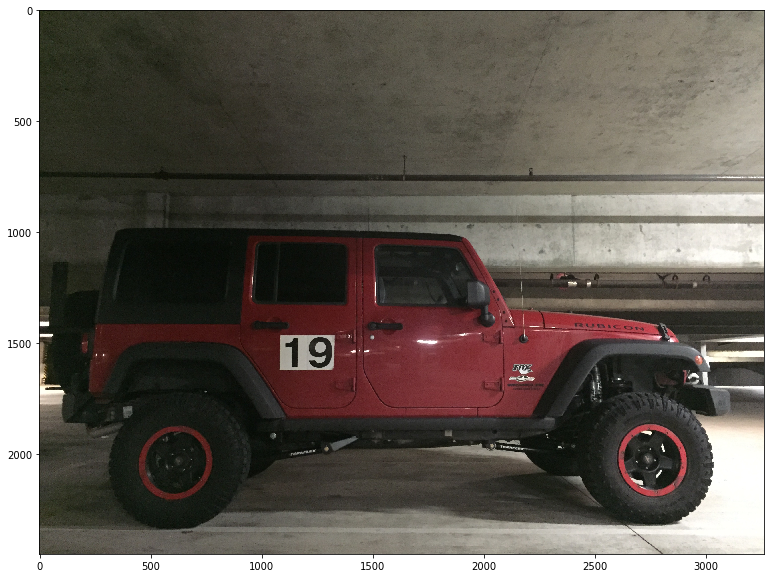

In [25]:
# 首先将图片读入为矩阵
# 我们可以用pyplot的imshow()方法来展示图片
#  这时我曾经拥有的牧马人
#
img_data = imageio.imread('./pics/wranglerJK.jpg')
print(img_data.data.shape)

img = Image.fromarray(img_data, 'RGB')
plt.imshow(img)

In [34]:
def my_init(shape, dtype=None):
    new_mat = np.zeros((shape[0], shape[1], 3, 3))
    for i in range(shape[0]):
        for j in range(shape[1]):
            new_mat[:, :, i, j] = filter_mat
    return np.array(new_mat, dtype=dtype)



def MyFilter(filter_mat):
    print(len(filter_mat.shape))
    if len(filter_mat.shape)!=2:
        print('Invalid filter matrix. It must be 2-D')
        return []
    else:
        kernel_size=filter_mat.shape
        row, col, depth = img_data.shape
        input_shape=img_data.shape
        filter_size = row*col*depth
        print(filter_size)


        model = Sequential()
        model.add(Conv2D(depth, 
                         kernel_size=kernel_size, 
                         input_shape=input_shape, 
                         padding='same', 
                         activation='linear', 
                         data_format='channels_last',
                         kernel_initializer=my_init,
                         name='Conv')                         
                  )
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='sgd', loss='mse')
        model.summary()


        inX = model.input                                          
        outputs = [layer.output for layer in model.layers if layer.name=='Conv']     
        functions = [K.function([inX], [out]) for out in outputs]   

        layer_outs = [func([img_data.reshape(1, row, col, depth)]) for func in functions]
        activationLayer = layer_outs[0][0]
        temp = (activationLayer-np.min(activationLayer))
        normalized_activationLayer = temp/np.max( np.max(temp))
        return(normalized_activationLayer.reshape(row, col, depth))

2
23970816
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv (Conv2D)                (None, 2448, 3264, 3)     84        
_________________________________________________________________
dense_8 (Dense)              (None, 2448, 3264, 1)     4         
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


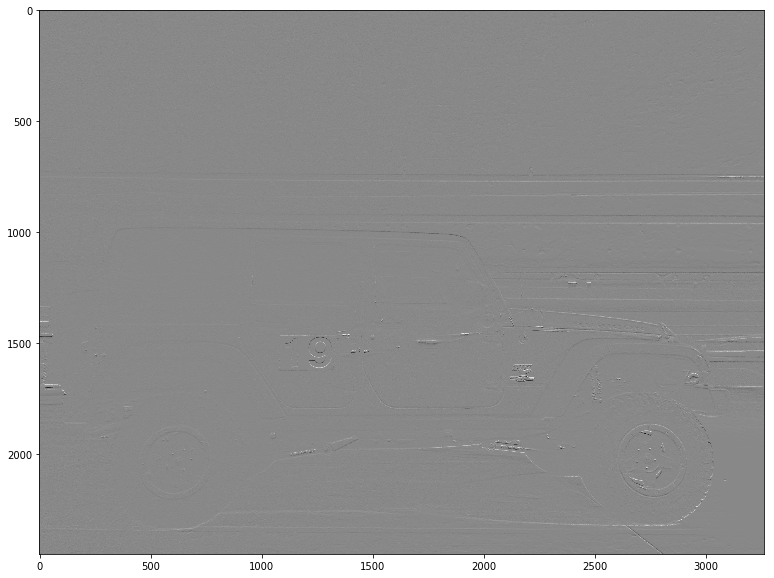

In [37]:
#filter_mat = np.array([1/4, 1/4, 1/4, 1/4,1/4, 1/4, 1/4, 1/4, 1/4]).reshape(3, 3)
filter_mat = np.array([-1, -2, -3, 0, 0, 0, 1, 2, 3]).reshape(3, 3)

outLayer = MyFilter(filter_mat)
plt.imshow(outLayer)

In [182]:
print(K.image_data_format())

channels_last


### 使用一维卷积神经网络进行文本分类模型

我们从前面了解到，卷积神经网络具备优异的特征萃取能力，但是通常用在图像数据的建模中，如何用在文本数据中呢？下面我们就来解开谜底。

在实际使用中，一句话都是以单词索引下标表示的列表，长短不一，因此先要对其进行补齐，将每一句话补齐为同样长度，才方便使用。这时可以选择的补齐长度不一，既可以选择最大的句子长度作为需要补齐的长度，也可以选择所有句子长度的中位值来补齐。

把句子补齐之后，每一句话就称为一个整数的时间序列，是一串连续的信号。在使用卷积层的时机上，可以有两种选择。一是直接在这个时候使用，将卷积操作应用于连续的单词下标列表，直接抽取特征；二是先将补齐后的每一句话通过嵌入层映射到一个稍微低维度的致密空间，再对该致密空间的连续信号使用卷积算子，抽取特征。第一种方法因为单词的下标顺序并无特定含义，因此效果不一定好。

在keras中，我们可以使用Embedding层来引入嵌入层，通常直接用在输入层后。我们使用Conv1D来引入一维卷积层。我们甚至可以对信号进行多次卷积。下面分别介绍这两者用法。



Embedding层的作用是将输入的代表文字的单词索引下标转化为固定长度向量，只能用作除开输入层之后的第一层。比如输入的一句话以其单词对应的索引下标表示为一个整数列表：[3， 9， 11， 478， 3， 2]，Embedding层经过计算可能将其转化为[0.45， 1.98， 2.11， 0.04， 0.31]的形式，其中这个向量的大小（5个元素）是作为一个参数输入模型。

下面我们使用上一节使用过的对酒店的褒贬评价作为样例展示实际操作。作为展示，我们这个模型较为简单，结构上是一个嵌入层接上一个一维卷积后再由一个全连接层输出褒贬概率。更为复杂的模型可以在卷积层方面进行复杂化，比如嵌套多个卷积层等。

在数据处理上，我们将把停止词从寻用文本中剔除。

In [1]:
def load_hotel_data():
    documents2 = []
    stopword = []
    label = []
    datafile_pos = './nlp_data/hotel_reviews_data/1000_pos.txt'
    datafile_neg = './nlp_data/hotel_reviews_data/1000_neg.txt'
    stopwordfile = './nlp_data/hotel_reviews_data/stopWord.txt'

    # 先读入stopword
    #fo=open(stopwordfile, encoding='UTF-8')
    with open(stopwordfile, encoding='UTF-8') as fo:
        for line in fo:
           stopword.append(line.strip('\n'))

    # 再读入原始评论文档
    with open(datafile_pos, encoding='UTF-8') as fo:
        for line in fo:
           documents2.append(line.strip('\n'))
           label.append(1)

    with open(datafile_neg, encoding='UTF-8') as fo:
        for line in fo:
           documents2.append(line.strip('\n'))    
           label.append(0)
            
    return documents2, label, stopword

documents2, label, stopwords = load_hotel_data();
print(documents2[:3])

['距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.房间较为简单.', '商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!', '早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。']


In [2]:
print(stopwords[:25])

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎哟', '唉', '俺', '俺们', '按', '按照']


我们需要先将停止词从文本中删除。

In [3]:
import cntext 
import jieba
from keras.preprocessing import sequence

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
max_words = 500
stopwords_str = ''.join(stopwords)
tokenizer = cntext.cnTokenizer(filters=stopwords_str, char_level=True)
%time tokenizer.fit_on_cntexts(documents2)
V = len(tokenizer.word_index) 
%time text_sequences=tokenizer.cntexts_to_sequences(documents2)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xieliang\AppData\Local\Temp\jieba.cache
Loading model cost 0.765 seconds.
Prefix dict has been built succesfully.


Wall time: 2.71 s
Wall time: 999 ms


In [5]:
for i in range(3):
    print(tokenizer.index_word[i+1])

房
店
酒


In [6]:
documents2[:2]

['距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.房间较为简单.',
 '商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!']

In [7]:
import numpy as np
temp=' '.join('距离川沙公路较近,但是公交指示不对,如果是"蔡陆线"的话,会非常麻烦.建议用别的路线.房间较为简单.')
#cntext.cntext_to_word_sequence(temp)
#temp2=jieba.cut(temp.strip())
#temp3 = [x for x in temp2 if x!=' ']
np.max([len(x) for x in text_sequences] )
#print(temp3)

271

In [60]:
max_len = 250
text_sequences_padded = sequence.pad_sequences(text_sequences, maxlen=max_len)
x_binary_coding = tokenizer.sequences_to_matrix(text_sequences)
print(x_binary_coding.shape)
print(text_sequences_padded.shape)

(2000, 2025)
(2000, 250)


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.DataFrame(text_sequences_padded)
print(X.head())
Y = pd.get_dummies(label)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.250, random_state = 8798797)
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(x_binary_coding, Y, test_size=0.25, random_state=138723)

   0    1    2    3    4    5    6    7    8    9    ...   240  241  242  \
0    0    0    0    0    0    0    0    0    0    0  ...     0  222  232   
1    0    0    0    0    0    0    0    0    0    0  ...     6   24    1   
2    0    0    0    0    0    0    0    0    0    0  ...     0    0    8   
3    0    0    0    0    0    0    0    0    0    0  ...     0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...   225  247   57   

    243  244  245  246  247  248   249  
0  1299  659  563  466  105  100     1  
1     1   24  564   95  234  361     7  
2    12  288   91    3    2   99   163  
3    34   33  142  107  206  245  1630  
4    29  383  173  400  297   18   138  

[5 rows x 250 columns]


In [86]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten, LSTM
from keras.datasets import imdb
from keras.utils import to_categorical
from keras import metrics

In [102]:
max_features = x_train.shape[1]
embedding_dims = 1500
filters = 250
kernel_size = 3
hidden_dims = 550
lstm_dims=100
out_dim=2
epochs = 2

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=max_len))
model.add(Dropout(0.2))
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters, kernel_size, padding='valid',activation='sigmoid',strides=2))
# we use max pooling:
model.add(MaxPooling1D())
model.add(LSTM(lstm_dims, dropout=0.2, recurrent_dropout=0.2))
#model.add(Flatten())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(out_dim, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 250, 1500)         375000    
_________________________________________________________________
dropout_46 (Dropout)         (None, 250, 1500)         0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 124, 250)          1125250   
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 250)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               140400    
_________________________________________________________________
dense_56 (Dense)             (None, 550)               55550     
_________________________________________________________________
activation_13 (Activation)   (None, 550)               0         
__________

In [103]:
batch_size = 256
epochs = 20
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          #validation_split=0.250,
          validation_data = (X_test, Y_test),
          verbose=1)

Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7002 - acc: 0.5087 - val_loss: 0.6914 - val_acc: 0.5200
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6962 - acc: 0.4987 - val_loss: 0.6957 - val_acc: 0.4800
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6896 - acc: 0.5340 - val_loss: 0.6885 - val_acc: 0.5380
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6871 - acc: 0.5553 - val_loss: 0.6818 - val_acc: 0.5420
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6713 - acc: 0.5820 - val_loss: 0.6548 - val_acc: 0.6260
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6481 - acc: 0.6233 - val_loss: 0.6531 - val_acc: 0.6080
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5918 - acc: 0.6953 - val_loss: 0.6002 - val_acc: 0.6880
Epoch 8/20
1500

In [83]:
model0 = Sequential()
model0.add(Dense(500, input_shape=(Xb_train.shape[1],), activation='tanh'))
model0.add(Dropout(0.25))
model0.add(Dense(256, activation='sigmoid'))
model0.add(Dropout(0.25))
model0.add(Dense(64, activation='sigmoid'))
model0.add(Dense(2, activation='softmax'))
model0.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 500)               1013000   
_________________________________________________________________
dropout_31 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               128256    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 130       
Total params: 1,157,834
Trainable params: 1,157,834
Non-trainable params: 0
_________________________________________________________________


In [84]:
batch_size = 256
epochs = 10
model0.fit(Xb_train, Yb_train,
          batch_size=batch_size,
          epochs=epochs,
           validation_data=(Xb_test, Yb_test),
          verbose=1)

Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 1s 771us/step - loss: 0.7069 - acc: 0.5173 - val_loss: 0.6694 - val_acc: 0.5320
Epoch 2/10
1500/1500 [==============================] - 0s 42us/step - loss: 0.6372 - acc: 0.6640 - val_loss: 0.6136 - val_acc: 0.7300
Epoch 3/10
1500/1500 [==============================] - 0s 42us/step - loss: 0.5419 - acc: 0.7873 - val_loss: 0.5309 - val_acc: 0.7580
Epoch 4/10
1500/1500 [==============================] - 0s 62us/step - loss: 0.4313 - acc: 0.8313 - val_loss: 0.4813 - val_acc: 0.7800
Epoch 5/10
1500/1500 [==============================] - 0s 42us/step - loss: 0.3452 - acc: 0.8493 - val_loss: 0.4594 - val_acc: 0.7800
Epoch 6/10
1500/1500 [==============================] - 0s 42us/step - loss: 0.2834 - acc: 0.8793 - val_loss: 0.4635 - val_acc: 0.8020
Epoch 7/10
1500/1500 [==============================] - 0s 42us/step - loss: 0.2390 - acc: 0.8953 - val_loss: 0.4603 - val_acc: 0.8240
Epoch 8

In [104]:
embedding_dim = 1500
lstm_dim = 100
batch_size= 32
epochs = 10

# 构建LSTM网络完成情感分析
model1 = Sequential()
model1.add(Embedding(embedding_dim, embed_dim, input_length = X_train.shape[1]))
model1.add(Dropout(0.2))
model1.add(LSTM(lstm_dim, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(2,activation='softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 250, 16)           24000     
_________________________________________________________________
dropout_48 (Dropout)         (None, 250, 16)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               46800     
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 202       
Total params: 71,002
Trainable params: 71,002
Non-trainable params: 0
_________________________________________________________________


In [105]:
# 拟合与训练模型
model.fit(X_train, Y_train, batch_size =batch_size, validation_data=(X_test, Y_test), epochs=30)

Train on 1500 samples, validate on 500 samples
Epoch 1/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3031 - acc: 0.8747 - val_loss: 0.5227 - val_acc: 0.7780
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2378 - acc: 0.9053 - val_loss: 0.5734 - val_acc: 0.7780
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1945 - acc: 0.9213 - val_loss: 0.6425 - val_acc: 0.7900
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1537 - acc: 0.9433 - val_loss: 0.6983 - val_acc: 0.8140
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1223 - acc: 0.9513 - val_loss: 0.6936 - val_acc: 0.8000
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1203 - acc: 0.9487 - val_loss: 0.8129 - val_acc: 0.8020
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1056 - acc: 0.9547 - val_loss: 0.8850 - val_acc: 0.7780
Epoch 8/30
1500

In [113]:
from sklearn.linear_model import LogisticRegression
y = np.array(label)
clf = LogisticRegression(random_state=0, solver='lbfgs', C=1.05,
                          multi_class='multinomial').fit(Xb_train, Yb_train.iloc[:, 0])

clf.predict_proba(Xb_train[:2, :]) 
print(clf.score(Xb_train, Yb_train.iloc[:, 0]))
print(clf.score(Xb_test, Yb_test.iloc[:, 0]))

0.9546666666666667
0.812


### 使用二维卷积神经网络进行文本分类模型

我们也可以使用二维卷积神经网络对文本建模。这是因为，我们可以将一个文本中相邻的单词对应的词向量叠加起来，那么对于任意给定的窗口，这些叠加的词向量就构成一个类似图片的二维“面板”数据。

从《词嵌入与词向量》这节课中我们了解到可以将一组文本中的任意单词映射到一个指定维度的新的空间。这个指定的维度通常比文本中全部单词所需要的维度低很多，但是通常仍然需要数百维。我们需要将使用卷积神经网络将这数百维的向量再次压缩到更低的向量中。对于这样一个一维的连续信号，完全可以使用上面提到的一维卷积方法，一方面可以将维度从数百维降为更低维度，另一方面又能尽可能萃取最有用的信号。

以下列文本为例（已经分词）。

## 基于RNN/LSTM的文本分类模型

In [6]:
import pandas as pd
import numpy as np
import cntext 
import jieba


In [2]:
file = './nlp_data/douban_moview_reviews/DMSC.csv'
raw = pd.read_csv(file, header=0)
raw.head()

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017-01-22,2,更深的白色,2015-04-24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017-01-22,3,有意识的贱民,2015-04-26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017-01-22,4,不老的李大爷耶,2015-04-23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017-01-22,5,ZephyrO,2015-04-22,2,虽然从头打到尾，但是真的很无聊啊。,723


In [3]:
%%time
documents = [raw.Comment[i] for i in range(raw.shape[0]) ]

Wall time: 54 s


In [124]:
tokenizer = cntext.cnTokenizer()
%time tokenizer.fit_on_cntexts(documents)
V = len(tokenizer.word_index) + 1
%time text_sequences=tokenizer.cntexts_to_sequences(documents)

Wall time: 8min 29s
Wall time: 7min 41s


In [90]:
len(list(tokenizer.word_counts))

328940

In [123]:
temp = list(text_sequences[:2])
print(len(temp))
print(temp)
text_sequences_padded = sequence.pad_sequences(text_sequences, maxlen=400)

2
[[478, 3192, 2516, 1389, 1, 45, 853, 2020, 16, 90, 1, 114, 5, 1, 3193, 1, 304, 1, 125, 29, 1068, 1, 187, 98, 656, 2517, 1, 6, 3194, 1], [207, 162, 56, 1, 6, 155, 1, 3195, 2518, 2519, 1, 452, 28, 657, 598, 18, 1]]


In [66]:
 y = (raw.Star>4)*1

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.datasets import imdb
from keras.utils import to_categorical
from keras import metrics

In [ ]:
# set parameters:
max_features = V
maxlen = 400
batch_size = 64
embedding_dims = 500
filters = 250
kernel_size = 3
hidden_dims = 250
out_dim=1
epochs = 2

#x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
#x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
%time text_sequences_padded = sequence.pad_sequences(text_sequences, maxlen=maxlen)
#y_binary = to_categorical(y)
y_binary = y

In [114]:
n_train=1500000
train_id = np.random.choice(range(len(text_sequences_padded)), n_train)
x_train = text_sequences_padded[train_id]
x_test = text_sequences_padded[train_id]

y_train = y_binary[train_id]
y_test = y_binary[~train_id]

KeyError: 'None of [[-2010426 -1242272  -614911 ...  -866547 -2050221  -146121]] are in the [index]'

In [70]:
y_train.mean(axis=0)

0.273432

In [71]:
print(len(text_sequences_padded))
print(y_binary.shape)
y_binary[:4]

2125056
(2125056,)


0    0
1    0
2    0
3    0
Name: Star, dtype: int32

In [93]:
max_features = 5000
embedding_dims = 100
filters = 250
kernel_size = 3
hidden_dims = 250
out_dim=1
epochs = 2

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='sigmoid',
                 strides=2))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(out_dim, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 400, 100)          500000    
_________________________________________________________________
dropout_42 (Dropout)         (None, 400, 100)          0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 199, 250)          75250     
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 99, 250)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 24750)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 250)               6187750   
_________________________________________________________________
dropout_43 (Dropout)         (None, 250)               0         
__________

In [94]:
batch_size = 256
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 1500000 samples, validate on 625056 samples
Epoch 1/2
1500000/1500000 [==============================] - 230s 153us/step - loss: 11.5832 - acc: 0.2734 - val_loss: 10.1282 - val_acc: 0.3647
Epoch 2/2
1500000/1500000 [==============================] - 227s 152us/step - loss: 11.5832 - acc: 0.2734 - val_loss: 10.1282 - val_acc: 0.3647


In [105]:
%time ypred = model.predict_proba(x_train, batch_size=1024)
ypred[:5]

Wall time: 40.8 s


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, ypred)

0.5

In [107]:
y_train.mean()

0.273432

### 二维卷积网络建模

我们也可以引入二维卷积方法来建模。这时候我们需要采取下列步骤：

1. 将所有单词通过某种嵌入方法，比如word2vec，映射为一个致密空间内的词向量。
2. 把每一句话里面的每一个单词用词向量表示。
3. 将每句话表示为一个二维的矩阵，其中每一行代表每一个单词，而列则是对应的词向量。因为句子长短有别，因此需要对这些二维矩阵做补齐（padding）的操作。
4. 使用二维卷积神经网络模型来建模。最基本的改造就是把上面模型的Conv1D和MaxPooling1D修改为Conv2D和MaxPooling2D方法。当然可以在网络结构是进行升级，比如引入多层卷积等操作。